# Approssimazione con $S^0 (\Omega)$

Dato $ \Omega = [a,b)$, una partizione $ P = \{ t_0 = a < t_1 < \ldots < t_n = b \} $ e un parametro $ \beta \in [0,1] $ vogliamo studiare l'operatore $\mathcal{A}_{\beta,P} : \mathcal{C}^0(\Omega) \to S^0(\Omega)$ definito come $ f \mapsto \sum_{i=1}^n f(\eta_{k,\beta}) \chi_{I_k}$ con $\eta_{k,\beta} = t_{k-1} + \beta (t_k - t_{k-1})$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider
import ipywidgets as widgets
import math
from Partition import Partition
from ConstantApproximation import ConstantApproximation

In [6]:
def _testInteractive(funct, a, b, n, beta):
    interp = ConstantApproximation(Partition.Uniform(a,b,n), funct, beta)
    interp.plot()
    
def interactive(fun):
    nSlid = IntSlider(min=2, max=30, step=1, continuous_update=False)
    betaSlid = FloatSlider(min=0.0, max=1.0, step=0.05, continuous_update=False)
    
    interact(_testInteractive, funct=fixed(fun), a=(-10.0,10.0, 0.5), b=(0.0,10.0, 0.5), n=nSlid, beta=betaSlid)

# Variazione dei parametri
Prendiamo come funzione $ f(x) = x^2 $ e confrontiamo la target function e l'approssimante al variare dei parametri

In [7]:
f = lambda x : x*x

In [8]:
interactive(f)

interactive(children=(FloatSlider(value=0.0, description='a', max=10.0, min=-10.0, step=0.5), FloatSlider(valu…

# Errore vs Beta

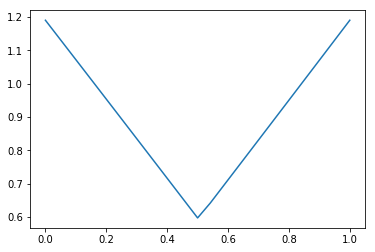

In [10]:
a = -4.0
b = 6.0
n = 100
errors = []
interps = []

for beta in np.linspace(0.0, 1.0, 25):
    u = Partition.Uniform(a,b,n)
    interp = ConstantApproximation(u, f, beta)
    interps.append(interp)
    errors.append(interp.maxNormError(points = 70))
    
plt.plot(np.linspace(0.0, 1.0, 25), errors)
plt.show()

# EOC
Plottiamo l'errore in norma infinito vs il numero di elementi nella partizione che è proporzionale a $ \frac{1}{h} $
Definiamo come $EOC_n = \log_2 \left( \frac{e_{n/2}}{e_n} \right)$ e studiamo l'ordine di convergenza delle funzioni $f_{\rho}(x) = x^{\rho}$ con $x \in [0,1]$
Ricordiamo che i risultati teorici ci dicono che:

1. L'errore in norma infinito scende in modo lineare con la dimensione della partizione se e solo se f è Lipschitz.
2. L'errore in norma infinito scende in modo proporzionale a $h_{\mathcal{P}}^{\alpha}$ con $\alpha \in (0,1)$ se e solo se $f \in Hol^{\alpha}\left([0,1]\right)$.
3. Se l'errore in norma infinito scende più velocemente che linearmente, allora la $f$ è una costante.

In [73]:
def TestEOC(p, n_start, runs, a, b):
    plt.figure(figsize=(16,9))
    n = n_start
    f = lambda x : x**p
    errors = []
    EOC_n = []
    ns = [n_start * (2**n) for n in range(runs)]
    
    plt.ylim((0.0, 1.1))
    
    for i in range(runs):
        u = Partition.Uniform(a, b, n)
        interp = ConstantApproximation(u, f, beta)
        errors.append(interp.maxNormError(points = 1, mon=True))
        EOC_n.append(math.log(errors[i-1] / errors[i], 2))
        n = n * 2       
    
    plt.axhline(1.0, color="r", dashes=[10,10], linewidth = 0.5)
    plt.plot(ns, EOC_n)
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='p', max=2.0), Output()), _dom_classes=('widget-inter…

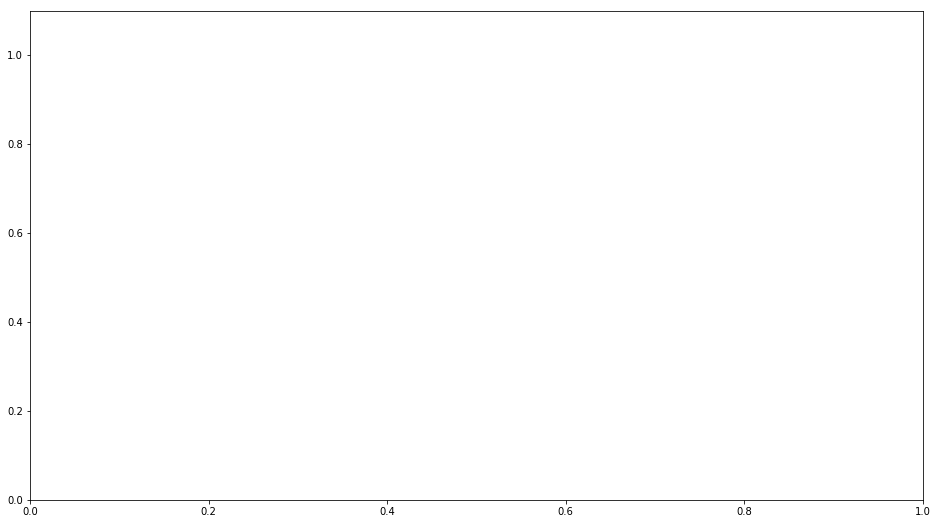

In [75]:
interact(TestEOC, p=(0.0, 2), n_start=fixed(8), runs=fixed(6), a=fixed(0), b=fixed(1));

Notiamo che per $p \gg 1$, l'EOC raggiunge il suo valore teorico solo per n più grandi. Si può spiegare a causa della norma $\mathcal{A}_r$ più grande di queste funzioni, o della loro costante di Lipschitz più grande.